# PREDICTING AVOCADO PRICES USING FACEBOOK PROPHET 





# STEP #0: PROBLEM STATEMENT

- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 

- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold



# STEP #1: IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation

import random
import seaborn as sns
from fbprophet import Prophet

In [2]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')


# STEP #2: EXPLORING THE DATASET  

In [3]:
#Let's check for missing data

avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [4]:
# Let's view the head of the training dataset
avocado_df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [5]:
#drop the unnamed column since it does not contribute to our analysis

avocado_df = avocado_df.drop('Unnamed: 0',axis=1)

In [6]:
# Let's view the last elements in the training dataset
avocado_df.tail(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
#chekcing the data types

avocado_df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
#convert the data column from object datatype to datetype

avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

In [9]:
avocado_df = avocado_df.sort_values("Date")

In [10]:
#checking the initial and last dates

avocado_df['Date'].head(),avocado_df['Date'].tail()

(11569   2015-01-04
 9593    2015-01-04
 10009   2015-01-04
 1819    2015-01-04
 9333    2015-01-04
 Name: Date, dtype: datetime64[ns], 8574    2018-03-25
 9018    2018-03-25
 18141   2018-03-25
 17673   2018-03-25
 8814    2018-03-25
 Name: Date, dtype: datetime64[ns])

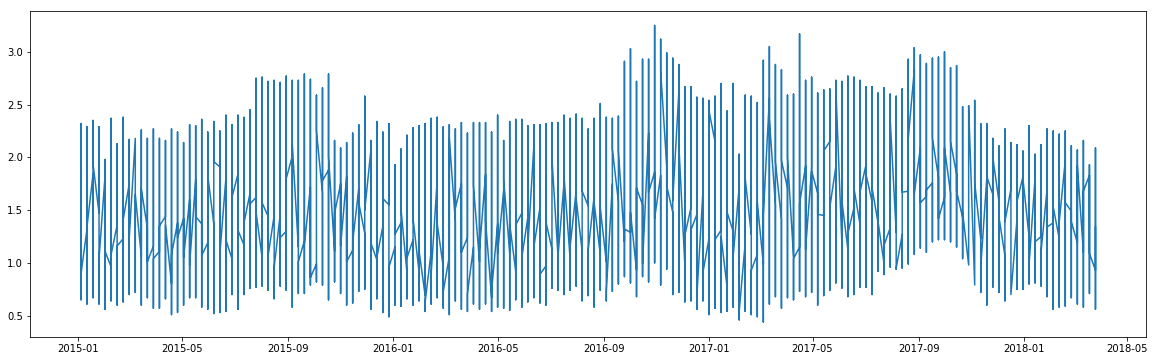

In [11]:
plt.figure(figsize=(20,6))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

In [12]:
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

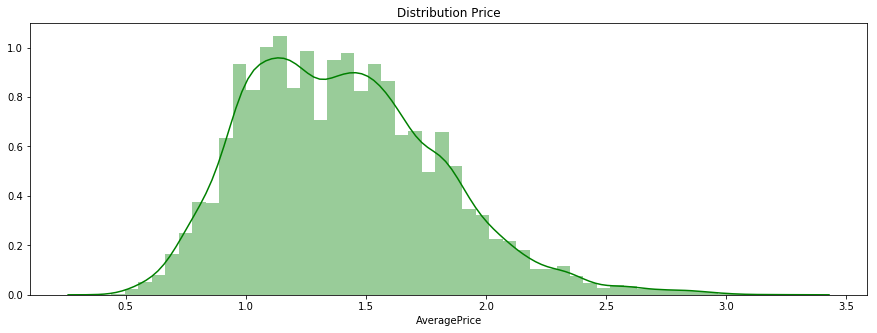

In [13]:
#Let's look at the price distribution

pl.figure(figsize=(15,5))
pl.title("Distribution Price")
ax = sns.distplot(avocado_df["AveragePrice"], color = 'g')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

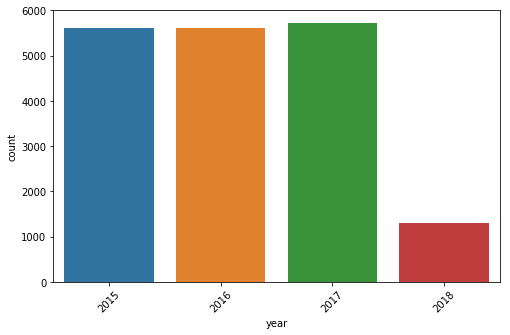

In [14]:
# Bar Chart to indicate the year
plt.figure(figsize=[8,5])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)


In [15]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']] 


In [16]:
avocado_prophet_df.shape

(18249, 2)

In [17]:
avocado_prophet_df.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


# STEP 3: MAKE PREDICTIONS

In [18]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})


In [19]:
avocado_prophet_df.shape

(18249, 2)

In [20]:
avocado_prophet_df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64



- Prophet is open source software released by Facebook’s Core Data Science team.

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 

- For more information, please check this out: https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


In [21]:
m = Prophet()
m.fit(avocado_prophet_df)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
# Forcasting into the future
future_complete = m.make_future_dataframe(periods=365)
forecast_complete = m.predict(future_complete)

In [23]:
forecast_complete[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,1.384733,0.902314,1.880042
1,2015-01-04,1.384733,0.886722,1.854126
2,2015-01-04,1.384733,0.890300,1.883654
3,2015-01-04,1.384733,0.887715,1.894153
4,2015-01-04,1.384733,0.893166,1.858904


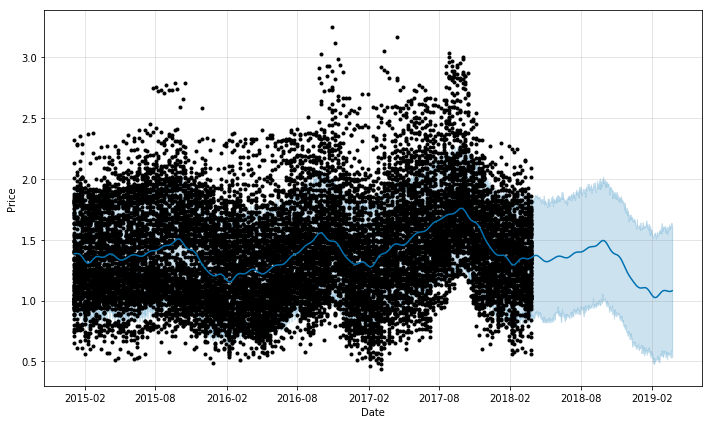

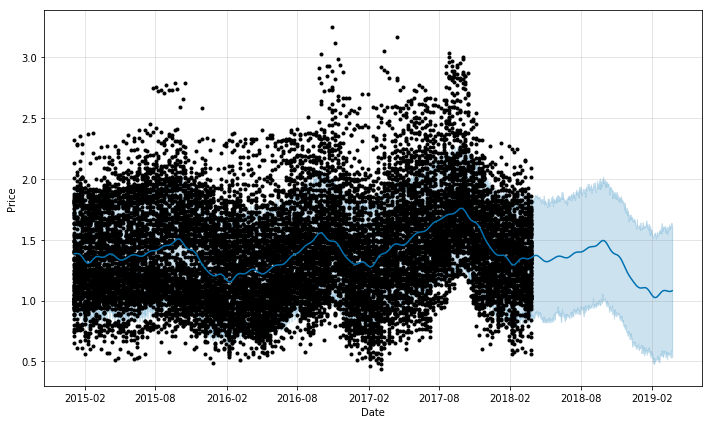

In [24]:
m.plot(forecast_complete, xlabel='Date', ylabel='Price')

In [25]:
?m.plot_components

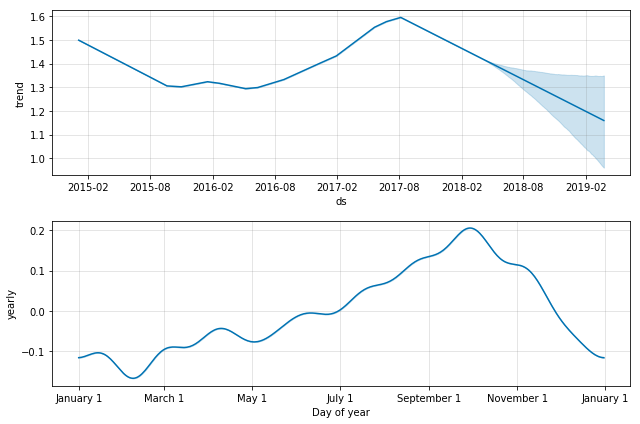

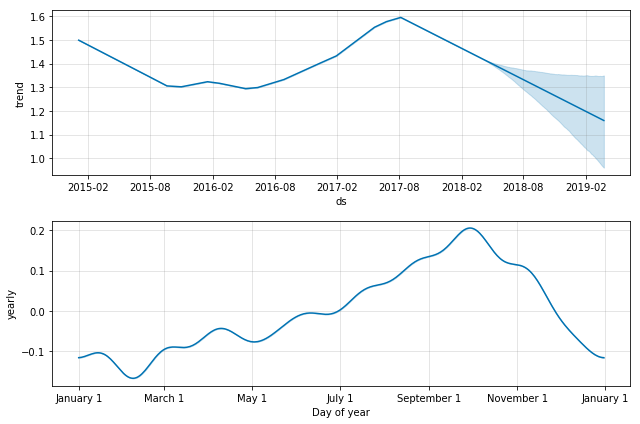

In [26]:
m.plot_components(forecast_complete)